#### **SMA LAB**

Name - Mohd Zaki Mehtab Qureshi<br>
Roll No. - 19CO40<br>
Class - BECO<br>
Sem - 8<br>

# **Experiment No. 9**
Analyze compettior activities- eg (compare chatgpt4 vs chat sonic vs google bard  using google trends, similar web, +scrape tweets of each, perform sentiment analysis and create comparative sentiment bar graph)

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 4.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import os
Mycompany = 'Airbus'
Competitor1 = 'emirates'
Competitor2 = 'vistara'
os.system(f"snscrape --json --max-results 500 --since 2023-04-8 twitter-search '{Mycompany}' > {Mycompany}_tweets.json")
os.system(f"snscrape --json --max-results 500 --since 2023-04-8 twitter-search '{Competitor1}' > {Competitor1}_tweets.json")
os.system(f"snscrape --json --max-results 500 --since 2023-04-8 twitter-search '{Competitor2}' > {Competitor2}_tweets.json")

0

In [5]:
df_mycompany = pd.read_json(f'/content/{Mycompany}_tweets.json', lines=True)
df_competitor1 = pd.read_json(f'/content/{Competitor1}_tweets.json', lines=True)
df_competitor2 = pd.read_json(f'/content/{Competitor2}_tweets.json', lines=True)

In [6]:
df_mycompany.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/ghostmodephotos/status/164...,2023-04-11 08:35:07+00:00,I've got NASA lunar work under my belt for sen...,I've got NASA lunar work under my belt for sen...,1645707035089190912,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,NaN,I've got NASA lunar work under my belt for sen...,[],,[],,ghostmodephotos
1,snscrape.modules.twitter.Tweet,https://twitter.com/italiavola/status/16457068...,2023-04-11 08:34:31+00:00,Marzo per Airbus su chiude con 61 aerei conseg...,Marzo per Airbus su chiude con 61 aerei conseg...,1645706885729775617,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,NaN,NaN,Marzo per Airbus su chiude con 61 aerei conseg...,[http://italiavola.com/2023/04/11/marzo-per-ai...,http://italiavola.com/2023/04/11/marzo-per-air...,[https://t.co/dqgHAW1o8e],https://t.co/dqgHAW1o8e,italiavola
2,snscrape.modules.twitter.Tweet,https://twitter.com/jetlinemarvel/status/16457...,2023-04-11 08:34:11+00:00,How Airbus deftly avoided the A350 controversy...,How Airbus deftly avoided the A350 controversy...,1645706799943909378,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,NaN,NaN,How Airbus deftly avoided the A350 controversy...,[https://jetlinemarvel.net/how-airbus-deftly-a...,https://jetlinemarvel.net/how-airbus-deftly-av...,[https://t.co/mn2HbmrqJA],https://t.co/mn2HbmrqJA,jetlinemarvel
3,snscrape.modules.twitter.Tweet,https://twitter.com/Prodel3/status/16457066991...,2023-04-11 08:33:47+00:00,@laurenboebert 😂 did Macron exactly said that?...,@laurenboebert 😂 did Macron exactly said that?...,1645706699163021312,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,6.0,NaN,@laurenboebert 😂 did Macron exactly said that?...,[],,[],,Prodel3
4,snscrape.modules.twitter.Tweet,https://twitter.com/abovestockport/status/1645...,2023-04-11 08:33:38+00:00,FPY1 Play TF-PPA Airbus A320-251N \nAlti...,FPY1 Play TF-PPA Airbus A320-251N \nAlti...,1645706662295076864,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,3.0,NaN,FPY1 Play TF-PPA Airbus A320-251N \nAlti...,[],,[],,abovestockport


In [7]:
df_competitor1.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/EmiratesNBD_AE/status/1645...,2023-04-11 08:35:18+00:00,"@Adveta Hello Adveta, we replied to your direc...","@Adveta Hello Adveta, we replied to your direc...",1645707078885883905,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,NaN,"@Adveta Hello Adveta, we replied to your direc...",[],,[],,EmiratesNBD_AE
1,snscrape.modules.twitter.Tweet,https://twitter.com/heavenmyart/status/1645706...,2023-04-11 08:34:41+00:00,@Emirates_91 parce que t’es grave aigri des fois,@Emirates_91 parce que t’es grave aigri des fois,1645706926406131712,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,2.0,NaN,@Emirates_91 parce que t’es grave aigri des fois,[],,[],,heavenmyart
2,snscrape.modules.twitter.Tweet,https://twitter.com/FlyBellaUK/status/16457068...,2023-04-11 08:34:22+00:00,@KM_Aviation @emirates @GLA_Airport The tail p...,@KM_Aviation @emirates @GLA_Airport The tail p...,1645706845103718402,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.0,NaN,@KM_Aviation @emirates @GLA_Airport The tail p...,[],,[],,FlyBellaUK
3,snscrape.modules.twitter.Tweet,https://twitter.com/anousha_ahmed/status/16457...,2023-04-11 08:33:54+00:00,The UAE's commitment to humanitarian leadershi...,The UAE's commitment to humanitarian leadershi...,1645706727654825991,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,NaN,The UAE's commitment to humanitarian leadershi...,[],,[],,anousha_ahmed
4,snscrape.modules.twitter.Tweet,https://twitter.com/EmiratesNewsGz/status/1645...,2023-04-11 08:33:33+00:00,Tempest Launches Premier Private Search and Br...,Tempest Launches Premier Private Search and Br...,1645706638610010113,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,NaN,NaN,Tempest Launches Premier Private Search and Br...,[http://dlvr.it/SmJ7yp],http://dlvr.it/SmJ7yp,[https://t.co/74qY9E6CYd],https://t.co/74qY9E6CYd,EmiratesNewsGz


In [8]:
df_competitor2.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/airvistara/status/16457070...,2023-04-11 08:35:17+00:00,"@rachitforever Hi Rachit, please allow us some...","@rachitforever Hi Rachit, please allow us some...",1645707076964962305,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1,NaN,"@rachitforever Hi Rachit, please allow us some...",[],,[],,airvistara
1,snscrape.modules.twitter.Tweet,https://twitter.com/VistaraNews/status/1645704...,2023-04-11 08:26:58+00:00,Karnataka Elections 2023 : ಹಾಸನದಲ್ಲಿ ಭವಾನಿ ರೇವ...,Karnataka Elections 2023 : ಹಾಸನದಲ್ಲಿ ಭವಾನಿ ರೇವ...,1645704984129060864,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,16,NaN,Karnataka Elections 2023 : ಹಾಸನದಲ್ಲಿ ಭವಾನಿ ರೇವ...,[https://vistaranews.com/karnataka/karnataka-e...,https://vistaranews.com/karnataka/karnataka-el...,[https://t.co/J27BkSqVsR],https://t.co/J27BkSqVsR,VistaraNews
2,snscrape.modules.twitter.Tweet,https://twitter.com/VistaraNews/status/1645704...,2023-04-11 08:25:04+00:00,IPL 2023: ಆರ್​ಸಿಬಿ ವಿರುದ್ಧ ಲಕ್ನೋಗೆ ಗೆಲುವು; ಯಾವ...,IPL 2023: ಆರ್​ಸಿಬಿ ವಿರುದ್ಧ ಲಕ್ನೋಗೆ ಗೆಲುವು; ಯಾವ...,1645704503797374976,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,10,NaN,IPL 2023: ಆರ್​ಸಿಬಿ ವಿರುದ್ಧ ಲಕ್ನೋಗೆ ಗೆಲುವು; ಯಾವ...,[https://vistaranews.com/sports/ipl-2023-luckn...,https://vistaranews.com/sports/ipl-2023-luckno...,[https://t.co/1GKpKsQ2Sb],https://t.co/1GKpKsQ2Sb,VistaraNews
3,snscrape.modules.twitter.Tweet,https://twitter.com/VistaraNews/status/1645701...,2023-04-11 08:13:31+00:00,#BJPKarnataka: ನರೇಂದ್ರ ಮೋದಿ-ಬಿ.ಎಸ್‌. ಯಡಿಯೂರಪ್ಪ...,#BJPKarnataka: ನರೇಂದ್ರ ಮೋದಿ-ಬಿ.ಎಸ್‌. ಯಡಿಯೂರಪ್ಪ...,1645701600542068737,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,12,NaN,#BJPKarnataka: ನರೇಂದ್ರ ಮೋದಿ-ಬಿ.ಎಸ್‌. ಯಡಿಯೂರಪ್ಪ...,[https://vistaranews.com/karnataka/bjp-karnata...,https://vistaranews.com/karnataka/bjp-karnatak...,[https://t.co/3vegmelGAF],https://t.co/3vegmelGAF,VistaraNews
4,snscrape.modules.twitter.Tweet,https://twitter.com/VistaraNews/status/1645701...,2023-04-11 08:13:14+00:00,1984 anti sikh riots case: ಸಿಖ್ ವಿರೋಧಿ ದಂಗೆ ಆರ...,1984 anti sikh riots case: ಸಿಖ್ ವಿರೋಧಿ ದಂಗೆ ಆರ...,1645701529511534592,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,{'_type': 'snscrape.modules.twitter.SummaryCar...,16,NaN,1984 anti sikh riots case: ಸಿಖ್ ವಿರೋಧಿ ದಂಗೆ ಆರ...,[https://vistaranews.com/national/1984-anti-si...,https://vistaranews.com/national/1984-anti-sik...,[https://t.co/2i6nHbT8Zx],https://t.co/2i6nHbT8Zx,VistaraNews


In [9]:
df_mycompany = df_mycompany[['date', 'rawContent', 'renderedContent', 'user', 'replyCount', 'retweetCount', 'likeCount', 'lang', 'place', 'hashtags', 'viewCount']]
df_competitor1 = df_competitor1[['date', 'rawContent', 'renderedContent', 'user', 'replyCount', 'retweetCount', 'likeCount', 'lang', 'place', 'hashtags', 'viewCount']]
df_competitor2 = df_competitor2[['date', 'rawContent', 'renderedContent', 'user', 'replyCount', 'retweetCount', 'likeCount', 'lang', 'place', 'hashtags', 'viewCount']]

In [10]:
df_mycompany['renderedContent'] = df_mycompany['renderedContent'].str.replace('\]\[', ']|[')
df_competitor1['renderedContent'] = df_competitor1['renderedContent'].str.replace('\]\[', ']|[')
df_competitor2['renderedContent'] = df_competitor2['renderedContent'].str.replace('\]\[', ']|[')

<ipython-input-10-50e3b9aac92b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mycompany['renderedContent'] = df_mycompany['renderedContent'].str.replace('\]\[', ']|[')
<ipython-input-10-50e3b9aac92b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_competitor1['renderedContent'] = df_competitor1['renderedContent'].str.replace('\]\[', ']|[')
<ipython-input-10-50e3b9aac92b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_competitor2['renderedContent'] = df_competitor2['renderedContent'].str.replace('\]\[', ']|[')


In [11]:
def pre_process(text):
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r'http\S+', '', text)

    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)

    text = re.sub('[\r\n]+', ' ', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub('\s+', ' ', text)
    text = text.lower()
    return text

In [12]:
df_mycompany['processed_text'] = df_mycompany['renderedContent'].apply(pre_process)
df_competitor1['processed_text'] = df_competitor1['renderedContent'].apply(pre_process)
df_competitor2['processed_text'] = df_competitor2['renderedContent'].apply(pre_process)

In [13]:
!pip install scikit-learn
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [15]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [16]:
common_words_mycompany = get_top_n_bigram(df_mycompany['processed_text'], 20)
common_words_competitor1 = get_top_n_bigram(df_competitor1['processed_text'], 20)
common_words_competitor2 = get_top_n_bigram(df_competitor2['processed_text'], 20)

In [17]:
print(common_words_mycompany)
print(common_words_competitor1)
print(common_words_competitor2)

[('11 04', 121), ('04 2023', 121), ('airbus a320', 105), ('easyjet airbus', 62), ('ft distance', 54), ('km speed', 54), ('mph squawk', 54), ('a320 214', 52), ('nw havant', 52), ('airbus a330', 47), ('sw havant', 46), ('distance 14', 43), ('united kingdom', 41), ('ne havant', 41), ('airbus a319', 41), ('2023 07', 41), ('2023 06', 40), ('se havant', 38), ('heading ssw', 37), ('boeing 737', 35)]
[('arab emirates', 51), ('united arab', 50), ('للتواصل wa', 16), ('wa 355686001221', 16), ('355686001221 balkanparadise', 16), ('balkanparadise tours', 16), ('جنان البلقان', 13), ('dubai united', 12), ('abu dhabi', 10), ('super app', 9), ('emirates vacanciesiniraq', 9), ('vacanciesiniraq com', 9), ('com job', 9), ('world parkinson', 8), ('parkinson day', 8), ('استمتع بأجمل', 7), ('بأجمل رحلات', 7), ('رحلات الغوص', 7), ('الغوص في', 7), ('في أعماق', 7)]
[('vistaranews com', 178), ('com karnataka', 53), ('twitter com', 48), ('com messages', 47), ('messages compo', 47), ('thanks parakh', 37), ('com na

In [18]:
common_words_mycompany = pd.DataFrame(common_words_mycompany, columns = ['TweetText', 'count'])
common_words_competitor1 = pd.DataFrame(common_words_competitor1, columns = ['TweetText', 'count'])
common_words_competitor2 = pd.DataFrame(common_words_competitor2, columns = ['TweetText', 'count'])

In [19]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
sid = SentimentIntensityAnalyzer()
mycompany_sentiment_scores = df_mycompany['processed_text'].apply(sid.polarity_scores)
competitor1_sentiment_scores = df_competitor1['processed_text'].apply(sid.polarity_scores)
competitor2_sentiment_scores = df_competitor2['processed_text'].apply(sid.polarity_scores)

In [23]:
plt.close('all')

In [24]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    return polarity

df_mycompany_raw = df_mycompany.copy()
df_competitor1_raw = df_competitor1.copy()
df_competitor2_raw = df_competitor2.copy()

df_mycompany_raw['sentiment'] = df_mycompany['processed_text'].apply(analyze_sentiment)
df_competitor1_raw['sentiment'] = df_competitor1['processed_text'].apply(analyze_sentiment)
df_competitor2_raw['sentiment'] = df_competitor2['processed_text'].apply(analyze_sentiment)

In [26]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    return 'neutral'

df_mycompany['sentiment'] = df_mycompany_raw['sentiment'].apply(classify_sentiment)
df_competitor1['sentiment'] = df_competitor1_raw['sentiment'].apply(classify_sentiment)
df_competitor2['sentiment'] = df_competitor2_raw['sentiment'].apply(classify_sentiment)

In [27]:
mycompany_sentiment_counts = df_mycompany['sentiment'].value_counts()
competitor1_sentiment_counts = df_competitor1['sentiment'].value_counts()
competitor2_sentiment_counts = df_competitor2['sentiment'].value_counts()

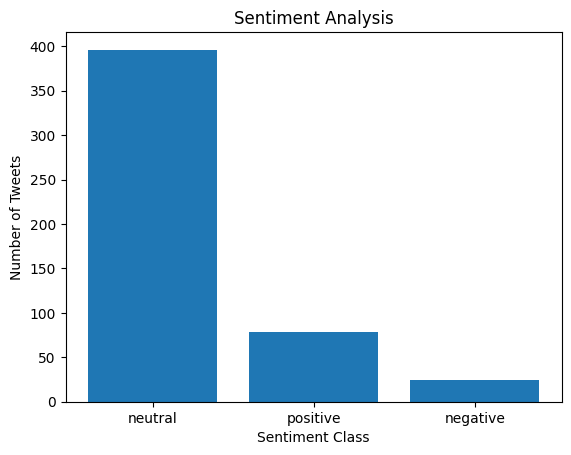

In [28]:
plt.bar(mycompany_sentiment_counts.index, mycompany_sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.show()

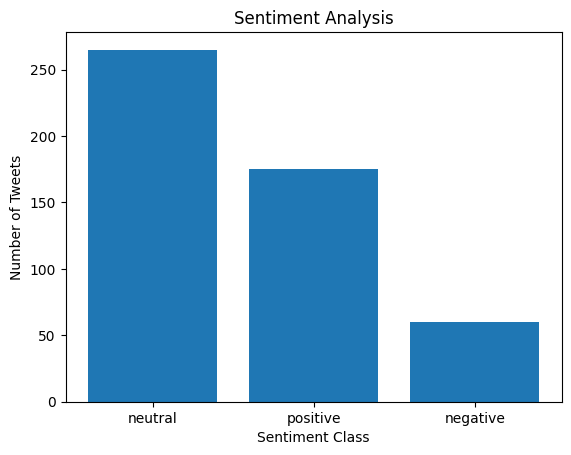

In [29]:
plt.bar(competitor1_sentiment_counts.index, competitor1_sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.show()

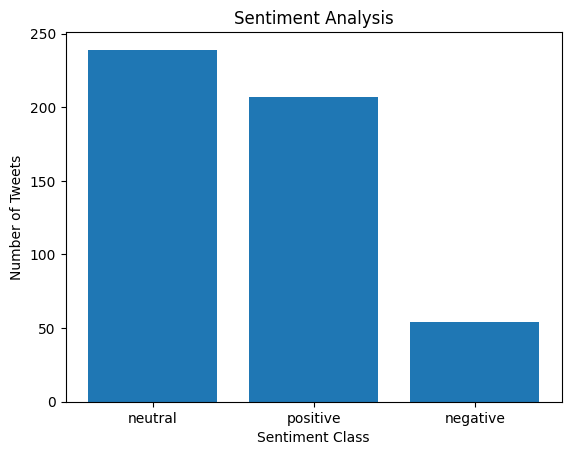

In [30]:
plt.bar(competitor2_sentiment_counts.index, competitor2_sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.show()

In [31]:
mycompany_very_negative_tweets = df_mycompany_raw[df_mycompany_raw['sentiment'] < -0.3]
competitor1_very_negative_tweets = df_competitor1_raw[df_competitor1_raw['sentiment'] < -0.3]
competitor2_very_negative_tweets = df_competitor2_raw[df_competitor2_raw['sentiment'] < -0.3]

In [32]:
from PIL import Image

In [33]:
mycompany_all_tweets = ' '.join(mycompany_very_negative_tweets['processed_text'])
competitor1_all_tweets = ' '.join(competitor1_very_negative_tweets['processed_text'])
competitor2_all_tweets = ' '.join(competitor2_very_negative_tweets['processed_text'])
def generateWordCloud(all_tweets):
    wordcloud = WordCloud(width=400, height=400, background_color='white', colormap='Blues').generate(all_tweets)
    plt.figure(figsize=(4,4), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

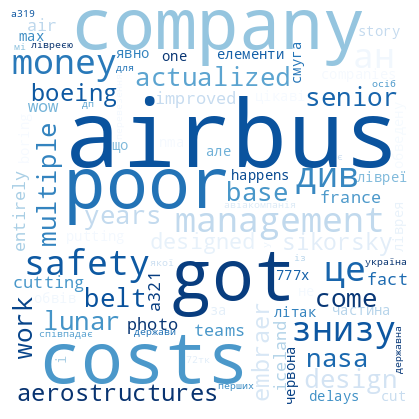

In [34]:
generateWordCloud(mycompany_all_tweets)

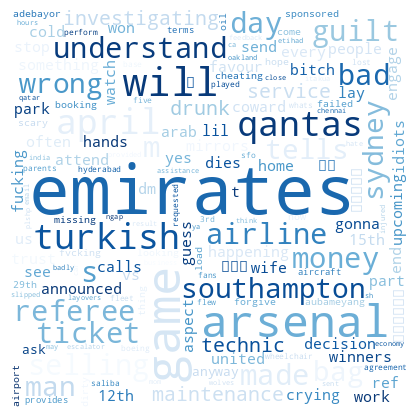

In [35]:
generateWordCloud(competitor1_all_tweets)

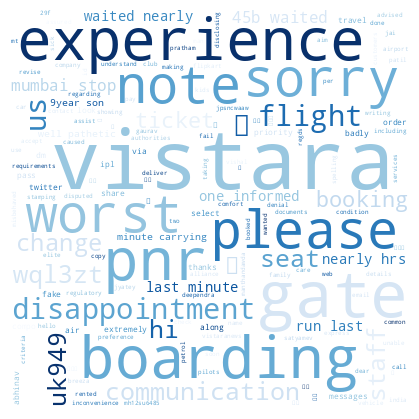

In [36]:
generateWordCloud(competitor2_all_tweets)